In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from time import time
from sklearn.metrics import mean_absolute_error, explained_variance_score
import seaborn as sns

In [2]:
# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
# Handling missing values (if any)
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Define kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

In [5]:
# Train and evaluate SVR for each kernel
for kernel in kernels:
    print(f"Training with {kernel} kernel...")
    svr = SVR(kernel=kernel)

    start_train = time()
    svr.fit(X_train, y_train)
    train_time = time() - start_train

    start_pred = time()
    predictions = svr.predict(X_test)
    pred_time = time() - start_pred

    # Compute Metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = svr.score(X_test, y_test)
    evs = explained_variance_score(y_test, predictions)

    # Store Results
    results[kernel] = {
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'explained_variance': evs,
        'train_time': train_time,
        'prediction_time': pred_time,
        'predictions': predictions
    }
    print(f"Kernel: {kernel} - MSE: {mse:.4f}, R^2: {r2:.4f}, Train Time: {train_time:.2f}s")


Training with linear kernel...
Kernel: linear - MSE: 0.5792, R^2: 0.5580, Train Time: 27.54s
Training with poly kernel...
Kernel: poly - MSE: 1.0048, R^2: 0.2332, Train Time: 364.46s
Training with rbf kernel...
Kernel: rbf - MSE: 0.3570, R^2: 0.7276, Train Time: 12.89s
Training with sigmoid kernel...
Kernel: sigmoid - MSE: 15252.4545, R^2: -11638.4612, Train Time: 27.39s


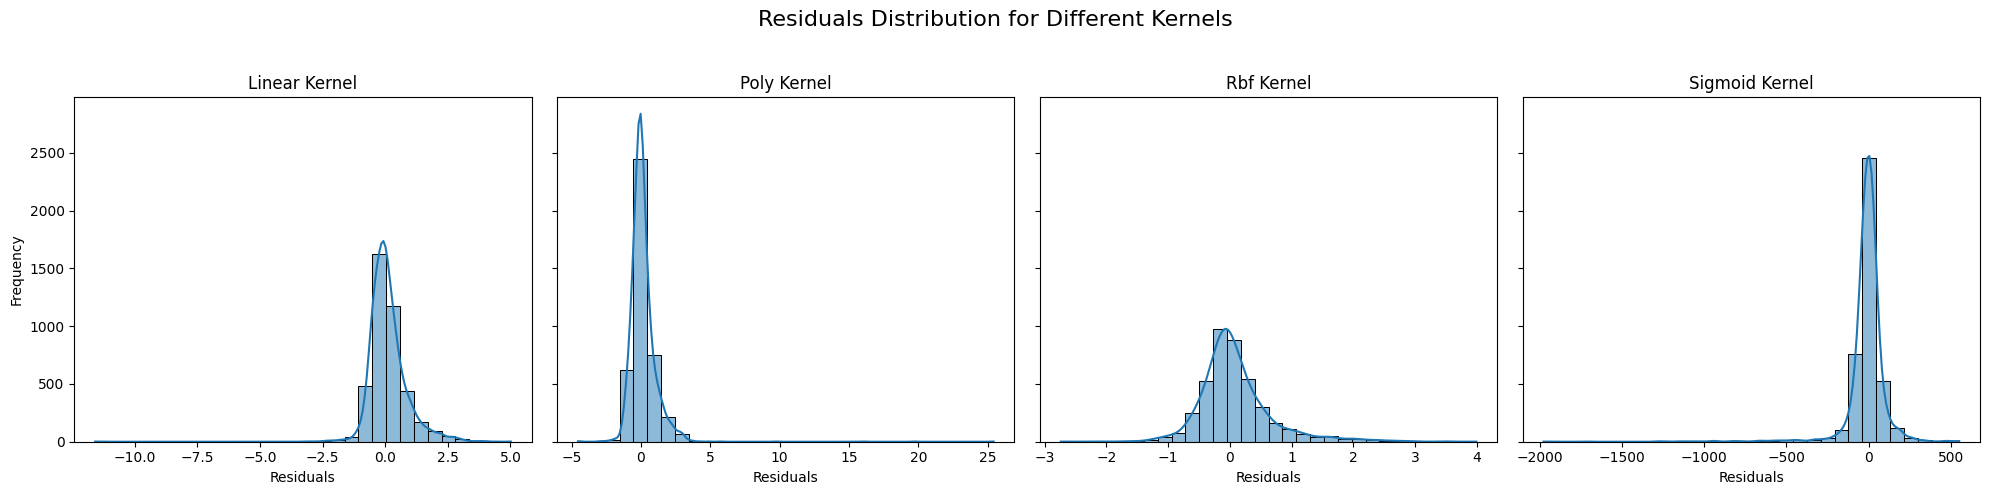

In [6]:
fig, axes = plt.subplots(1, len(results), figsize=(20, 5), sharey=True)
fig.suptitle("Residuals Distribution for Different Kernels", fontsize=16)

for ax, (kernel, res) in zip(axes, results.items()):
    residuals = y_test - res['predictions']
    sns.histplot(residuals, kde=True, bins=30, ax=ax)
    ax.set_title(f"{kernel.capitalize()} Kernel")
    ax.set_xlabel("Residuals")
    ax.set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

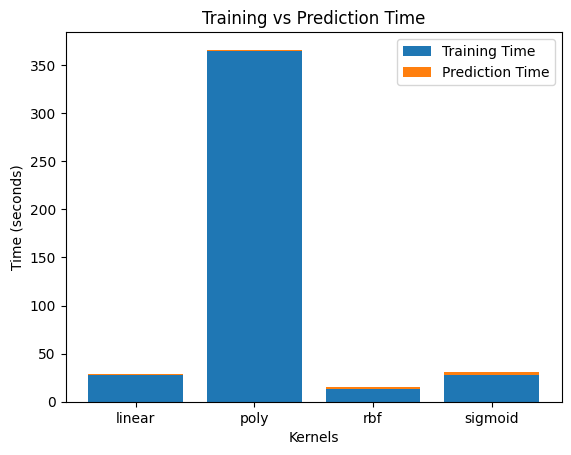

In [11]:
times = {k: (v['train_time'], v['prediction_time']) for k, v in results.items()}
kernels, times = zip(*times.items())
train_times, pred_times = zip(*times)

plt.bar(kernels, train_times, label='Training Time')
plt.bar(kernels, pred_times, bottom=train_times, label='Prediction Time')
plt.ylabel("Time (seconds)")
plt.xlabel("Kernels")
plt.title("Training vs Prediction Time")
plt.legend()
plt.show()

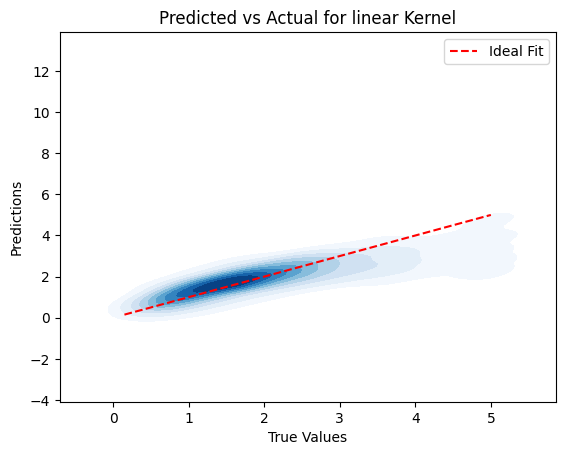

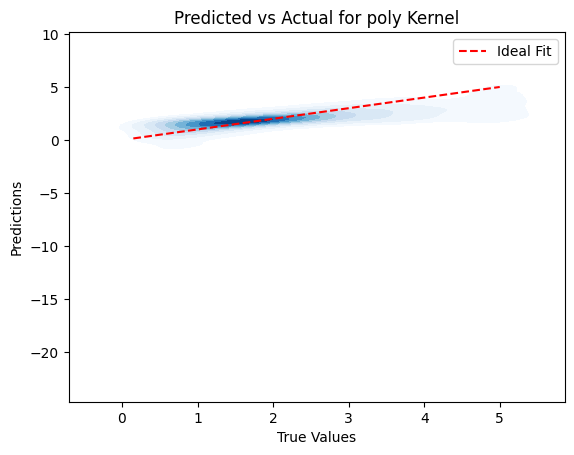

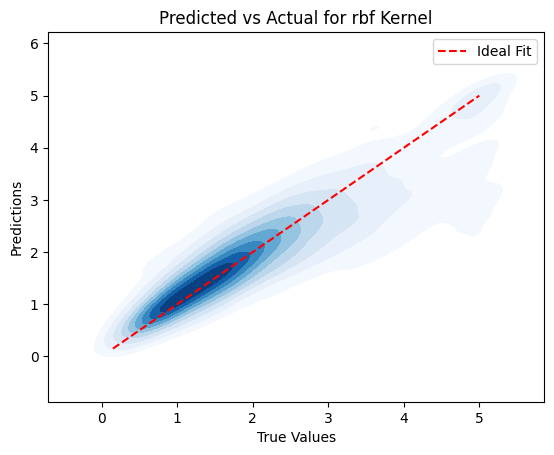

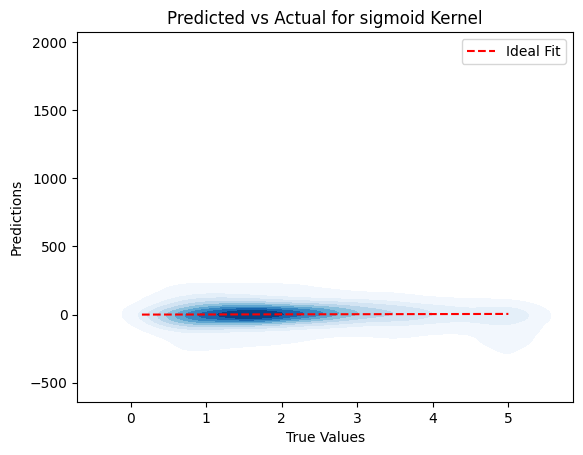

In [9]:

for kernel, res in results.items():
    plt.figure()
    sns.kdeplot(x=y_test, y=res['predictions'], cmap="Blues", fill=True)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
    plt.title(f"Predicted vs Actual for {kernel} Kernel")
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.legend()
    plt.show()